<a href="https://colab.research.google.com/github/jodavelo/artificial-intelligence/blob/main/Home_work1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Import all the necesary libraries and Classifiers

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
import nltk
import re
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
data = pd.read_csv('/content/gdrive/My Drive/Master/IA/DeepLearning/Homework1/gender-classifier-DFE-791531.csv',encoding='latin1')

Data Exploration

In [ ]:
data.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               20050 non-null  int64  
 1   _golden                20050 non-null  bool   
 2   _unit_state            20050 non-null  object 
 3   _trusted_judgments     20050 non-null  int64  
 4   _last_judgment_at      20000 non-null  object 
 5   gender                 19953 non-null  object 
 6   gender:confidence      20024 non-null  float64
 7   profile_yn             20050 non-null  object 
 8   profile_yn:confidence  20050 non-null  float64
 9   created                20050 non-null  object 
 10  description            16306 non-null  object 
 11  fav_number             20050 non-null  int64  
 12  gender_gold            50 non-null     object 
 13  link_color             20050 non-null  object 
 14  name                   20050 non-null  object 
 15  pr

Data Cleaning
we will be droping the redundant columns from our data

In [ ]:
data.drop(['_unit_id','_last_judgment_at','created','fav_number','profileimage','retweet_count','tweet_coord',
         '_trusted_judgments', 'tweet_count', 'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone',
         '_golden','_unit_state', 'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'sidebar_color',
         'profile_yn', 'profile_yn:confidence','gender:confidence'], axis=1, inplace=True)

In [ ]:
data.head()

,gender,description,text
0,male,i sing my own rhythm.,Robbie E Responds To Critics After Win Against...
1,male,I'm the author of novels filled with family dr...,ÛÏIt felt like they were my friends and I was...
2,male,louis whining and squealing and all,i absolutely adore when louis starts the songs...
3,male,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",Hi @JordanSpieth - Looking at the url - do you...
4,female,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,Watching Neighbours on Sky+ catching up with t...


we will check for null values

In [ ]:
data.isna().sum()

gender           97
description    3744
text              0
dtype: int64

Will drop the rows with null values

In [ ]:
data.dropna(axis = 0, inplace = True)

Let's count the gender column

In [ ]:
data['gender'].value_counts()

female     5725
male       5469
brand      4328
unknown     702
Name: gender, dtype: int64

we will only keep the male and female variables and drop the others.

In [ ]:
data = data[(data.gender == 'female') | (data.gender == 'male')]

And check the counts again

In [ ]:
data['gender'].value_counts()

female    5725
male      5469
Name: gender, dtype: int64

##Data Preprocessing

we will encode male and female category as 1 and 0

In [ ]:
for gen in data['gender']:
    if gen == 'male':
        data['gender'].replace({'male':1}, inplace = True)
    elif gen == 'female':
        data['gender'].replace({'female':0}, inplace = True)

data['gender'].value_counts()

0    5725
1    5469
Name: gender, dtype: int64

**Cleaning Text**

we will be cleaning the description column

In [ ]:
def clean(review):

    descrip = re.sub('[^a-zA-Z]', ' ', review)

    review = review.lower()
    return review

data['descrip_cleaned'] = pd.DataFrame(data['description'].apply(lambda x: clean(x)))

data.head()

,gender,description,text,descrip_cleaned
0,1,i sing my own rhythm.,Robbie E Responds To Critics After Win Against...,i sing my own rhythm.
1,1,I'm the author of novels filled with family dr...,ÛÏIt felt like they were my friends and I was...,i'm the author of novels filled with family dr...
2,1,louis whining and squealing and all,i absolutely adore when louis starts the songs...,louis whining and squealing and all
3,1,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",Hi @JordanSpieth - Looking at the url - do you...,"mobile guy. 49ers, shazam, google, kleiner pe..."
4,0,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,Watching Neighbours on Sky+ catching up with t...,ricky wilson the best frontman/kaiser chiefs t...


In [ ]:
data['descrip_cleaned'].replace('[@+]', "", regex=True,inplace=True)
data['descrip_cleaned'].replace('[()]', "", regex=True,inplace=True)
data['descrip_cleaned'].replace('[#+]', "", regex=True,inplace=True)
url_regex = '''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))'''
data['descrip_cleaned'] = data['descrip_cleaned'].replace(url_regex, "", regex=True)

In [ ]:
data.head()

,gender,description,text,descrip_cleaned
0,1,i sing my own rhythm.,Robbie E Responds To Critics After Win Against...,i sing my own rhythm.
1,1,I'm the author of novels filled with family dr...,ÛÏIt felt like they were my friends and I was...,i'm the author of novels filled with family dr...
2,1,louis whining and squealing and all,i absolutely adore when louis starts the songs...,louis whining and squealing and all
3,1,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",Hi @JordanSpieth - Looking at the url - do you...,"mobile guy. 49ers, shazam, google, kleiner pe..."
4,0,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,Watching Neighbours on Sky+ catching up with t...,ricky wilson the best frontman/kaiser chiefs t...


**Tokenize the cleaned descriptions**

Tokenization is the process of breaking text into smaller pieces which we know as tokens. More about Tokenization in this link

In [ ]:
data['descrip_cleaned'] = [nltk.word_tokenize(tweet) for tweet in data['descrip_cleaned']]
descrip_new = []
for each_row in data['descrip_cleaned']:
    descrip_new.append([i for i in each_row if i.isalpha()])
descrip_new_alpha = []

**Stopwords Removal**

stop words don't add any meaning to the sentences. we will remove them

In [ ]:
stop_words = set(stopwords.words('english'))
# now remove them from the list
for each_row in descrip_new:
    descrip_new_alpha.append([i for i in each_row if i not in stop_words])

**Lemmatization**

Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meanings to one word.

In [ ]:
description_new_lemma = []
lemma = nltk.WordNetLemmatizer()
for each_row in descrip_new_alpha:
    description_new_lemma.append([lemma.lemmatize(word) for word in each_row])
#put back the new sentences
data['descrip_cleaned'] = description_new_lemma
data['descrip_cleaned'] = [" ".join(desc) for desc in data['descrip_cleaned'].values]

**Text cleaning of the 'text' column**

whatever we've done for the 'description' column, will do that for 'text' column too

In [ ]:
data['text_cleaned'] = pd.DataFrame(data['text'].apply(lambda y: clean(y)))
data.head()


,gender,description,text,descrip_cleaned,text_cleaned
0,1,i sing my own rhythm.,Robbie E Responds To Critics After Win Against...,sing rhythm,robbie e responds to critics after win against...
1,1,I'm the author of novels filled with family dr...,ÛÏIt felt like they were my friends and I was...,author novel filled family drama romance,ûïit felt like they were my friends and i was...
2,1,louis whining and squealing and all,i absolutely adore when louis starts the songs...,louis whining squealing,i absolutely adore when louis starts the songs...
3,1,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",Hi @JordanSpieth - Looking at the url - do you...,mobile guy shazam google kleiner perkins yahoo...,hi @jordanspieth - looking at the url - do you...
4,0,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,Watching Neighbours on Sky+ catching up with t...,ricky wilson best chief best band xxxx thank k...,watching neighbours on sky+ catching up with t...


In [ ]:
data['text_cleaned'].replace('[@+]', "", regex=True,inplace=True)
data['text_cleaned'].replace('[()]', "", regex=True,inplace=True)
data['text_cleaned'].replace('[#+]', "", regex=True,inplace=True)
url_regex = '''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))'''
data['text_cleaned'] = data['text_cleaned'].replace(url_regex, "", regex=True)

In [ ]:
data['text_cleaned'] = [nltk.word_tokenize(tweet) for tweet in data['text_cleaned']]
text_new = []
for each_row in data['text_cleaned']:
    text_new.append([i for i in each_row if i.isalpha()])
text_new_alpha = []

In [ ]:
for each_row in text_new:
    text_new_alpha.append([i for i in each_row if i not in stop_words])

In [ ]:
text_new_lemma = []
for each_row in text_new_alpha:
    text_new_lemma.append([lemma.lemmatize(word) for word in each_row])
#put back the new sentences
data['text_cleaned'] = text_new_lemma
data['text_cleaned'] = [" ".join(desc) for desc in data['text_cleaned'].values]

In [ ]:
data.head()

,gender,description,text,descrip_cleaned,text_cleaned
0,1,i sing my own rhythm.,Robbie E Responds To Critics After Win Against...,sing rhythm,robbie e responds critic win eddie edward worl...
1,1,I'm the author of novels filled with family dr...,ÛÏIt felt like they were my friends and I was...,author novel filled family drama romance,felt like friend living story http retired http
2,1,louis whining and squealing and all,i absolutely adore when louis starts the songs...,louis whining squealing,absolutely adore louis start song hit hard fee...
3,1,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",Hi @JordanSpieth - Looking at the url - do you...,mobile guy shazam google kleiner perkins yahoo...,hi jordanspieth looking url use ifttt typicall...
4,0,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,Watching Neighbours on Sky+ catching up with t...,ricky wilson best chief best band xxxx thank k...,watching neighbour sky catching neighbs xxx xxx


**droping Redundant Columns description and text**

In [ ]:
data.drop(['description', 'text'], axis = 1, inplace = True)
data.head()

,gender,descrip_cleaned,text_cleaned
0,1,sing rhythm,robbie e responds critic win eddie edward worl...
1,1,author novel filled family drama romance,felt like friend living story http retired http
2,1,louis whining squealing,absolutely adore louis start song hit hard fee...
3,1,mobile guy shazam google kleiner perkins yahoo...,hi jordanspieth looking url use ifttt typicall...
4,0,ricky wilson best chief best band xxxx thank k...,watching neighbour sky catching neighbs xxx xxx


**vectorization of texts**

Text Vectorization is the process of converting text into numerical representation.
countvectorizer is one of the most straightforword vectorization method. we will use that in this project

In [ ]:
cv = CountVectorizer(max_features = 1000)
x = cv.fit_transform(data['descrip_cleaned']).toarray()
x1 = cv.fit_transform(data['text_cleaned']).toarray()

let's save these two set of vectors in two different pandas dataframe

In [ ]:
A = pd.DataFrame(x)
B = pd.DataFrame(x1)

and then concatenate these two dataframes

In [ ]:
X = pd.concat([B, A], join = 'outer', axis = 1)
X.shape

(11194, 2000)

the shape of this new dataframe matches shape of our gender column

In [ ]:
data['gender'].shape

(11194,)

Now build our independent variables and Target variable

In [ ]:
x = np.array(X)
y = np.array(data['gender'])

**Split the data into train test set**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [ ]:
y_train

array([1, 1, 0, ..., 1, 0, 0])

##Classification

# Single layer Perceptron

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Define the perceptron model

In [ ]:
model_perceptron = Sequential()
model_perceptron.add(Dense(1, input_dim=X_train.shape[1], activation='sigmoid'))

Compile the model

In [ ]:
model_perceptron.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Training stage

In [ ]:
model_perceptron.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
280/280 [==============================] - 1s 3ms/step - loss: 0.6843 - accuracy: 0.5672
Epoch 2/10
280/280 [==============================] - 1s 4ms/step - loss: 0.6567 - accuracy: 0.6689
Epoch 3/10
280/280 [==============================] - 1s 3ms/step - loss: 0.6353 - accuracy: 0.6924
Epoch 4/10
280/280 [==============================] - 1s 3ms/step - loss: 0.6181 - accuracy: 0.7052
Epoch 5/10
280/280 [==============================] - 1s 3ms/step - loss: 0.6038 - accuracy: 0.7168
Epoch 6/10
280/280 [==============================] - 1s 2ms/step - loss: 0.5918 - accuracy: 0.7195
Epoch 7/10
280/280 [==============================] - 1s 2ms/step - loss: 0.5816 - accuracy: 0.7251
Epoch 8/10
280/280 [==============================] - 1s 2ms/step - loss: 0.5726 - accuracy: 0.7266
Epoch 9/10
280/280 [==============================] - 1s 2ms/step - loss: 0.5648 - accuracy: 0.7314
Epoch 10/10
280/280 [==============================] - 1s 2ms/step - loss: 0.5578 - accuracy: 0.7349

Evaluation of model

In [ ]:
accuracy_perceptron = model_perceptron.evaluate(X_test, y_test)[1]

70/70 [==============================] - 1s 5ms/step - loss: 0.6247 - accuracy: 0.6512


Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

Get predictions

In [ ]:
# Obtener predicciones del modelo
y_pred = model_perceptron.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")

70/70 [==============================] - 0s 4ms/step


Generate the confusion matrix

In [ ]:
conf_matrix_perceptron = confusion_matrix(y_test, y_pred_classes)

Print matrix


In [ ]:
print(f'Confusion matrix for single layer perceptron:\n{conf_matrix_perceptron}')


accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)

Confusion matrix for single layer perceptron:
[[808 324]
 [457 650]]


In [ ]:
print('accuracy:'+ str(accuracy))
print('precision:'+ str(precision))
print('recall:'+ str(recall))
print('f1 score:'+ str(f1))

accuracy:0.6511835640911121
precision:0.6673511293634496
recall:0.5871725383920506
f1 score:0.6246996636232581


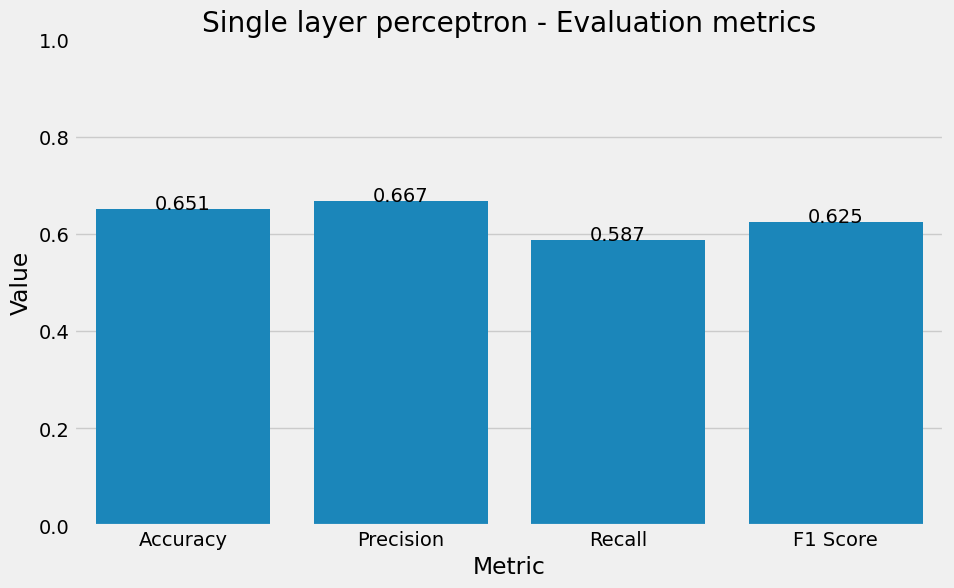

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create Dataframe with metrics
metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Value': [accuracy, precision, recall, f1]
})

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', data=metrics)
plt.title('Single layer perceptron - Evaluation metrics')
plt.ylim(0, 1)

# Show values in bars
for index, row in metrics.iterrows():
    plt.text(row.name, row.Value, round(row.Value,3), color='black', ha="center")

plt.show()


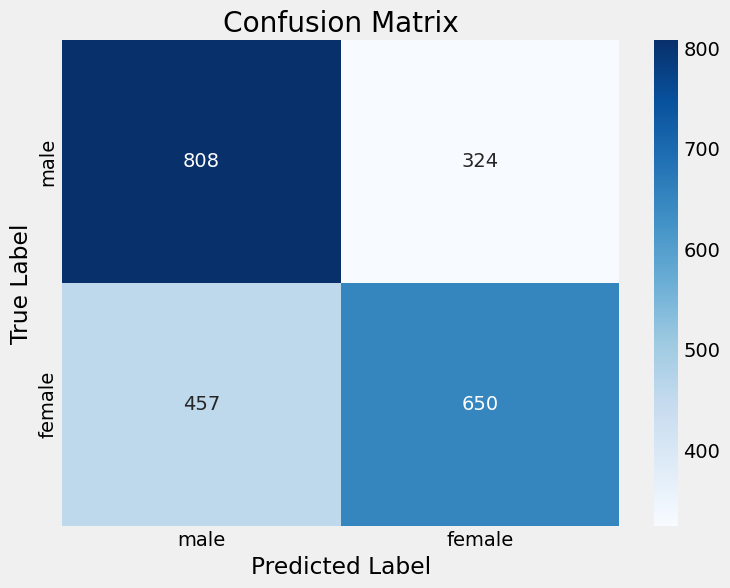

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_classes)


labels = ['male', 'female']

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


## Neural network with 1 hidden layer

In [ ]:
model_one_hidden = Sequential()
model_one_hidden.add(Dense(X_train.shape[1], input_dim=X_train.shape[1], activation='relu'))
model_one_hidden.add(Dense(1, activation='sigmoid'))

Compile model

In [ ]:
model_one_hidden.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Training the model

In [ ]:
model_one_hidden.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
280/280 [==============================] - 19s 64ms/step - loss: 0.6415 - accuracy: 0.6210
Epoch 2/10
280/280 [==============================] - 17s 62ms/step - loss: 0.4614 - accuracy: 0.7820
Epoch 3/10
280/280 [==============================] - 17s 62ms/step - loss: 0.2703 - accuracy: 0.8949
Epoch 4/10
280/280 [==============================] - 18s 64ms/step - loss: 0.1246 - accuracy: 0.9633
Epoch 5/10
280/280 [==============================] - 20s 72ms/step - loss: 0.0620 - accuracy: 0.9834
Epoch 6/10
280/280 [==============================] - 18s 66ms/step - loss: 0.0433 - accuracy: 0.9879
Epoch 7/10
280/280 [==============================] - 20s 72ms/step - loss: 0.0352 - accuracy: 0.9896
Epoch 8/10
280/280 [==============================] - 19s 67ms/step - loss: 0.0296 - accuracy: 0.9910
Epoch 9/10
280/280 [==============================] - 19s 66ms/step - loss: 0.0282 - accuracy: 0.9897
Epoch 10/10
280/280 [==============================] - 19s 67ms/step - loss: 0.028

Evaluation of model

In [ ]:
accuracy_one_hidden = model_one_hidden.evaluate(X_test, y_test)[1]

70/70 [==============================] - 2s 20ms/step - loss: 1.4846 - accuracy: 0.6391


70/70 [==============================] - 2s 22ms/step
Confusion matrix:
[[753 379]
 [429 678]]
Accuracy: 0.6391246092005359
Precision: 0.641438032166509
Recall: 0.6124661246612466
F1 Score: 0.6266173752310537


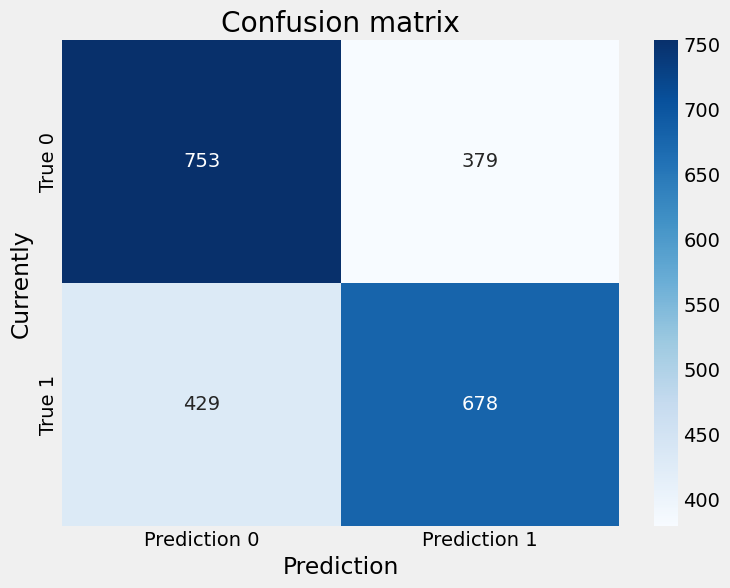

In [ ]:
y_pred = model_one_hidden.predict(X_test)
y_pred = (y_pred > 0.5)  # To Transform probabilities to labels of binary class

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Confusion matrix:\n{conf_matrix}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d',
            xticklabels=['Prediction 0', 'Prediction 1'],
            yticklabels=['True 0', 'True 1'],
            cmap="Blues", ax=ax)
plt.ylabel('Currently')
plt.xlabel('Prediction')
plt.title('Confusion matrix')
plt.show()


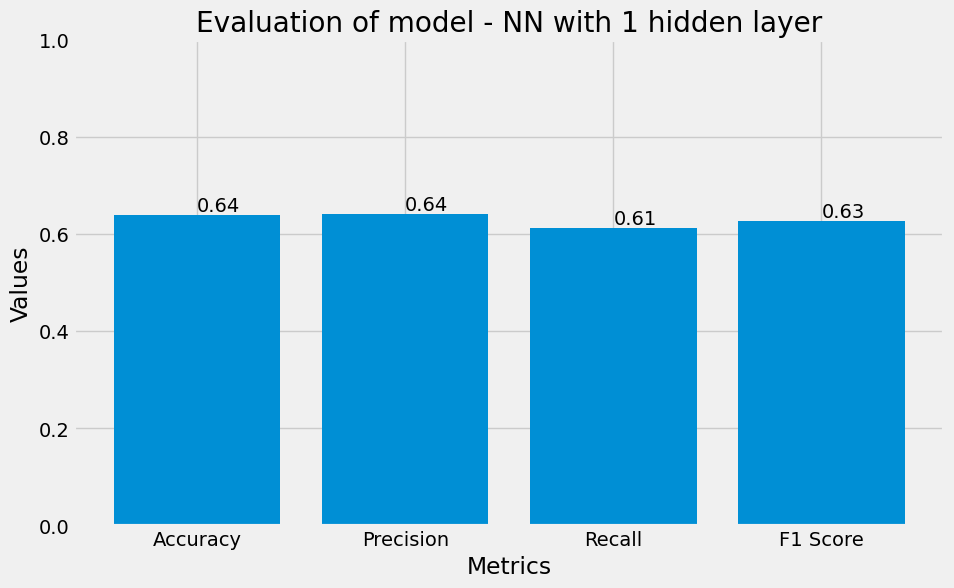

In [ ]:
import matplotlib.pyplot as plt


metrics_values = [accuracy, precision, recall, f1]
metrics_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(10, 6))
bars = plt.bar(metrics_labels, metrics_values)


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval,2), va='bottom')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Evaluation of model - NN with 1 hidden layer')
plt.ylim(0, 1)
plt.show()


Epoch 1/10
224/224 [==============================] - 18s 78ms/step - loss: 0.0275 - accuracy: 0.9894 - val_loss: 0.0257 - val_accuracy: 0.9944
Epoch 2/10
224/224 [==============================] - 15s 65ms/step - loss: 0.0224 - accuracy: 0.9908 - val_loss: 0.0188 - val_accuracy: 0.9955
Epoch 3/10
224/224 [==============================] - 14s 63ms/step - loss: 0.0212 - accuracy: 0.9915 - val_loss: 0.0192 - val_accuracy: 0.9955
Epoch 4/10
224/224 [==============================] - 15s 69ms/step - loss: 0.0224 - accuracy: 0.9911 - val_loss: 0.0195 - val_accuracy: 0.9955
Epoch 5/10
224/224 [==============================] - 14s 63ms/step - loss: 0.0204 - accuracy: 0.9912 - val_loss: 0.0385 - val_accuracy: 0.9922
Epoch 6/10
224/224 [==============================] - 15s 68ms/step - loss: 0.0218 - accuracy: 0.9911 - val_loss: 0.0238 - val_accuracy: 0.9944
Epoch 7/10
224/224 [==============================] - 14s 64ms/step - loss: 0.0207 - accuracy: 0.9918 - val_loss: 0.0295 - val_accuracy:

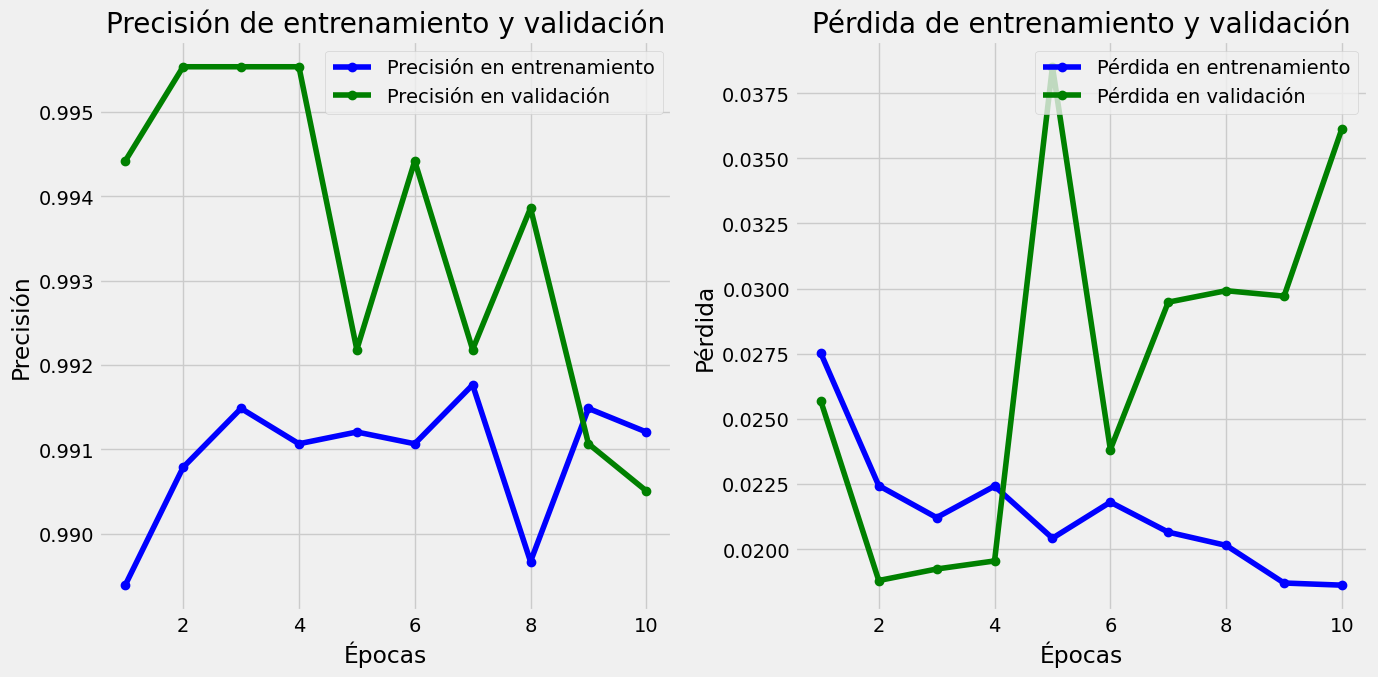

In [ ]:
import matplotlib.pyplot as plt

# Asumiendo que tu modelo se llama 'model_one_hidden' y ya está compilado.
history = model_one_hidden.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32)


# Suponiendo que 'history' es el objeto retornado por 'model.fit()'
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Crear gráfico para la precisión
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primer gráfico
plt.plot(epochs, acc, 'bo-', label='Precisión en entrenamiento')
plt.plot(epochs, val_acc, 'go-', label='Precisión en validación')
plt.title('Precisión de entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Crear gráfico para la pérdida
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segundo gráfico
plt.plot(epochs, loss, 'bo-', label='Pérdida en entrenamiento')
plt.plot(epochs, val_loss, 'go-', label='Pérdida en validación')
plt.title('Pérdida de entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()


## Neural Network with 2 hidden layers

In [ ]:
model_two_hidden = Sequential()
model_two_hidden.add(Dense(X_train.shape[1] // 2, input_dim=X_train.shape[1], activation='relu'))  # First hidden layer with the half of neurals
model_two_hidden.add(Dense(X_train.shape[1] // 2, activation='relu'))  # Second hidden layer with the same quantity of neurals
model_two_hidden.add(Dense(1, activation='sigmoid'))

# Compile
model_two_hidden.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training
model_two_hidden.fit(X_train, y_train, epochs=10, batch_size=32)

# Testing
accuracy_two_hidden = model_two_hidden.evaluate(X_test, y_test)[1]

Epoch 1/10
280/280 [==============================] - 13s 43ms/step - loss: 0.6425 - accuracy: 0.6153
Epoch 2/10
280/280 [==============================] - 13s 46ms/step - loss: 0.4625 - accuracy: 0.7767
Epoch 3/10
280/280 [==============================] - 12s 44ms/step - loss: 0.2026 - accuracy: 0.9143
Epoch 4/10
280/280 [==============================] - 12s 43ms/step - loss: 0.0620 - accuracy: 0.9798
Epoch 5/10
280/280 [==============================] - 11s 38ms/step - loss: 0.0306 - accuracy: 0.9876
Epoch 6/10
280/280 [==============================] - 11s 39ms/step - loss: 0.0222 - accuracy: 0.9894
Epoch 7/10
280/280 [==============================] - 12s 44ms/step - loss: 0.0172 - accuracy: 0.9912
Epoch 8/10
280/280 [==============================] - 12s 42ms/step - loss: 0.0165 - accuracy: 0.9906
Epoch 9/10
280/280 [==============================] - 12s 44ms/step - loss: 0.0148 - accuracy: 0.9918
Epoch 10/10
70/70 [==============================] - 1s 13ms/step - loss: 2.6584 -

### Metrics

In [ ]:
history_two_hidden = model_two_hidden.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32)


Epoch 1/10
224/224 [==============================] - 13s 58ms/step - loss: 0.0255 - accuracy: 0.9895 - val_loss: 0.0156 - val_accuracy: 0.9933
Epoch 2/10
224/224 [==============================] - 9s 40ms/step - loss: 0.0247 - accuracy: 0.9901 - val_loss: 0.0170 - val_accuracy: 0.9933
Epoch 3/10
224/224 [==============================] - 11s 48ms/step - loss: 0.0197 - accuracy: 0.9904 - val_loss: 0.0358 - val_accuracy: 0.9888
Epoch 4/10
224/224 [==============================] - 10s 43ms/step - loss: 0.0254 - accuracy: 0.9884 - val_loss: 0.0358 - val_accuracy: 0.9872
Epoch 5/10
224/224 [==============================] - 9s 39ms/step - loss: 0.0153 - accuracy: 0.9908 - val_loss: 0.0346 - val_accuracy: 0.9872
Epoch 6/10
224/224 [==============================] - 10s 45ms/step - loss: 0.0145 - accuracy: 0.9919 - val_loss: 0.0413 - val_accuracy: 0.9849
Epoch 7/10
224/224 [==============================] - 10s 46ms/step - loss: 0.0133 - accuracy: 0.9918 - val_loss: 0.0351 - val_accuracy: 0

**Chart of precision and loss**

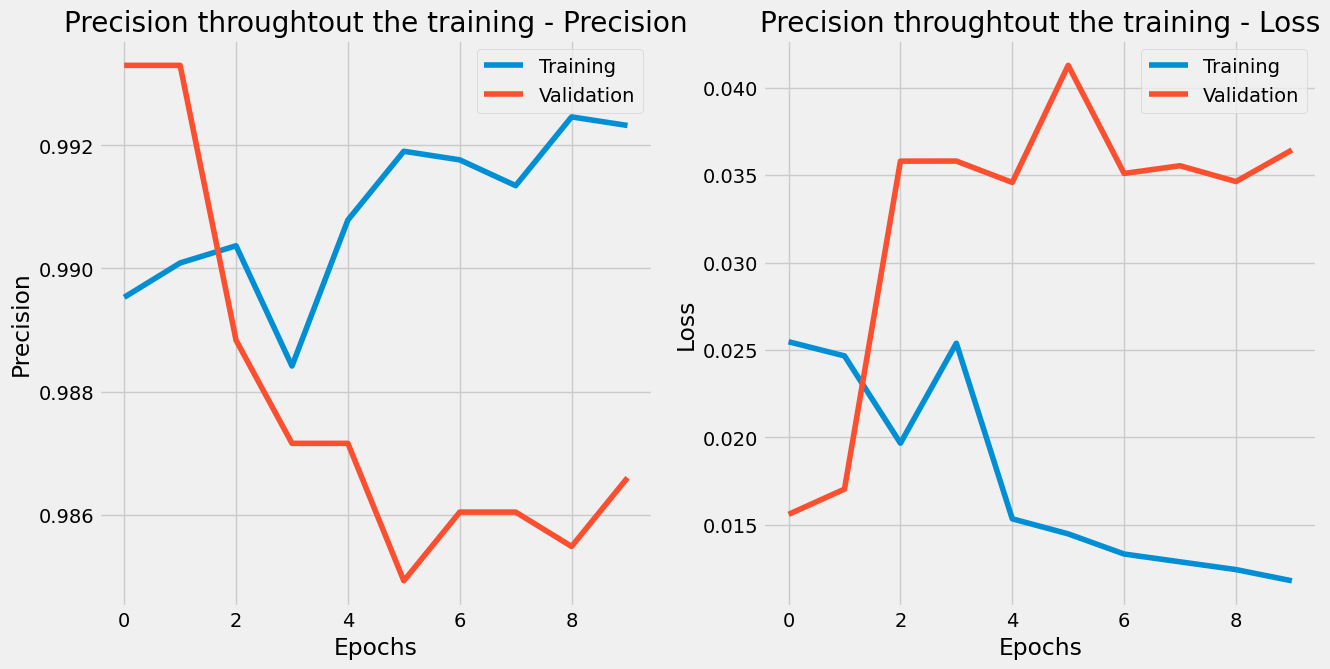

In [ ]:
#import matplotlib.pyplot as plt

# Precision
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(history_two_hidden.history['accuracy'], label='Training')
plt.plot(history_two_hidden.history['val_accuracy'], label='Validation')
plt.title('Precision throughtout the training - Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_two_hidden.history['loss'], label='Training')
plt.plot(history_two_hidden.history['val_loss'], label='Validation')
plt.title('Precision throughtout the training - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


**Evaluate model and calculate metrics**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Predictions
y_pred_two_hidden = model_two_hidden.predict(X_test)
y_pred_two_hidden = (y_pred_two_hidden > 0.5).astype(int)

# Confusion matrix
conf_matrix_two_hidden = confusion_matrix(y_test, y_pred_two_hidden)

# Metrics
accuracy_two_hidden = accuracy_score(y_test, y_pred_two_hidden)
precision_two_hidden = precision_score(y_test, y_pred_two_hidden)
recall_two_hidden = recall_score(y_test, y_pred_two_hidden)
f1_two_hidden = f1_score(y_test, y_pred_two_hidden)

print(f"Accuracy: {accuracy_two_hidden}")
print(f"Precision: {precision_two_hidden}")
print(f"Recall: {recall_two_hidden}")
print(f"F1 Score: {f1_two_hidden}")


70/70 [==============================] - 1s 13ms/step
Accuracy: 0.6346583296114336
Precision: 0.6324472960586618
Recall: 0.6233062330623306
F1 Score: 0.6278434940855323


**Visualization of confusion matrix**

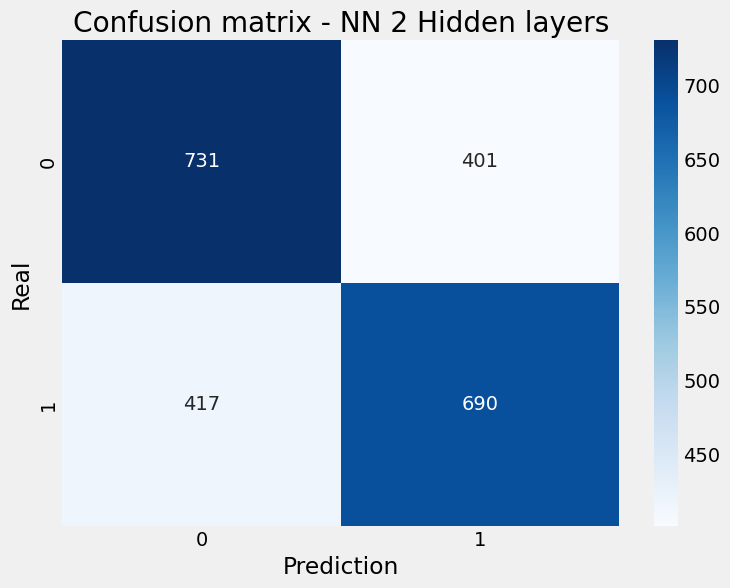

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_two_hidden, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Prediction')
plt.ylabel('Real')
plt.title('Confusion matrix - NN 2 Hidden layers')
plt.show()


**Bar charts for metrics of evaluation**

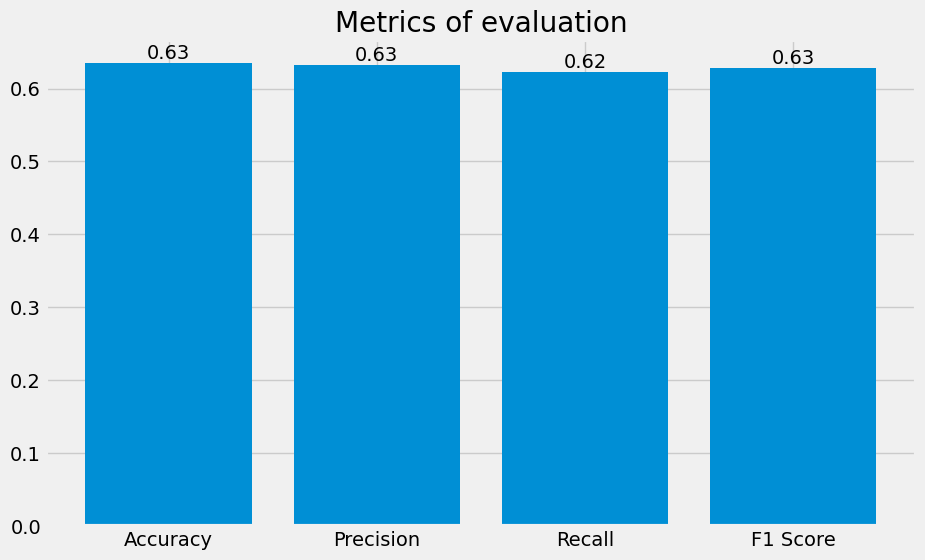

In [ ]:
metrics_values_two_hidden = [accuracy_two_hidden, precision_two_hidden, recall_two_hidden, f1_two_hidden]
metrics_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(10, 6))
plt.bar(metrics_labels, metrics_values_two_hidden)
for i, value in enumerate(metrics_values_two_hidden):
    plt.text(i, value, f"{value:.2f}", ha='center', va='bottom')
plt.title('Metrics of evaluation')
plt.show()


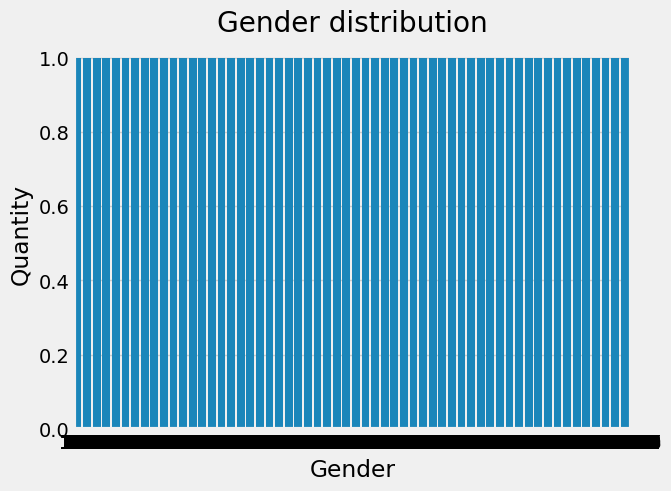

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribución de la variable 'gender'
sns.countplot(data['gender'])
plt.title('Gender distribution')
plt.xlabel('Gender')
plt.ylabel('Quantity')
plt.show()
